In [1]:
import pandas as pd
import tensorflow as tf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb



df = pd.read_csv('./insurance.csv',header=0, delimiter=",")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.corr

<bound method DataFrame.corr of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [5]:
df.shape

(1338, 7)

In [6]:
X = df.drop(['charges'], axis = 1)
y = df['charges']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [7]:
model = LinearRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [8]:
MSE = mean_squared_error(y_test,y_pred)
print("Коэффициенты:", model.coef_)
print("Свободный член:", model.intercept_)

# Оценка качества
print("R^2 на тесте:", model.score(X_test, y_test))
print(F"MSE:",MSE)

Коэффициенты: [ 2.56975706e+02  3.37092552e+02  4.25278784e+02 -1.85916916e+01
  2.36511289e+04 -3.70677326e+02 -6.57864297e+02 -8.09799354e+02]
Свободный член: -11931.219050326692
R^2 на тесте: 0.7835929767120723
MSE: 33596915.85136146


In [9]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1,1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# Оценка качества
r2 = svr.score(X_test, y_test)
print("R^2 на тесте:", r2)

# Пример предсказания (обратно в исходные единицы)
y_pred_scaled = svr.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1))


MSE = mean_squared_error(y_test,y_pred)
print(F"MSE:",MSE)
print("Пример предсказаний:", y_pred[:5].ravel())

R^2 на тесте: 0.8473573277687062
MSE: 292073147.28156054
Пример предсказаний: [ 8420.71303417  5021.6038462  27843.26373988  9788.94627801
 24630.45806264]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeRegressor(max_depth=6, random_state=42)  # max_depth ограничивает глубину
tree.fit(X_train, y_train)

# Оценка качества
print("R^2 на тесте:", tree.score(X_test, y_test))

# Текстовое представление дерева
tree_rules = export_text(tree, feature_names=list(X.columns))
print(tree_rules)

R^2 на тесте: 0.8061643978869217
|--- smoker_yes <= 0.50
|   |--- age <= 42.50
|   |   |--- age <= 22.50
|   |   |   |--- children <= 1.50
|   |   |   |   |--- bmi <= 28.26
|   |   |   |   |   |--- sex_male <= 0.50
|   |   |   |   |   |   |--- value: [2115.87]
|   |   |   |   |   |--- sex_male >  0.50
|   |   |   |   |   |   |--- value: [1697.68]
|   |   |   |   |--- bmi >  28.26
|   |   |   |   |   |--- children <= 0.50
|   |   |   |   |   |   |--- value: [2907.47]
|   |   |   |   |   |--- children >  0.50
|   |   |   |   |   |   |--- value: [5656.74]
|   |   |   |--- children >  1.50
|   |   |   |   |--- region_northwest <= 0.50
|   |   |   |   |   |--- bmi <= 21.84
|   |   |   |   |   |   |--- value: [6583.56]
|   |   |   |   |   |--- bmi >  21.84
|   |   |   |   |   |   |--- value: [3475.21]
|   |   |   |   |--- region_northwest >  0.50
|   |   |   |   |   |--- sex_male <= 0.50
|   |   |   |   |   |   |--- value: [22972.44]
|   |   |   |   |   |--- sex_male >  0.50
|   |   |   |   

In [11]:
rf = RandomForestRegressor(
    n_estimators=200,      # количество деревьев
    max_depth=None,        # глубина (None = до упора)
    random_state=42,
    n_jobs=-1              # использовать все ядра процессора
)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)
# Оценка качества
MSE = mean_squared_error(y_test,y_pred)
print(F"MSE:",MSE)
print("R^2 на тесте:", rf.score(X_test, y_test))

# Важность признаков
importances = pd.Series(rf.feature_importances_, index=X.columns)
print("Важность признаков:")
print(importances.sort_values(ascending=False))

MSE: 21039978.52953915
R^2 на тесте: 0.8644756815249467
Важность признаков:
smoker_yes          0.609377
bmi                 0.214840
age                 0.134682
children            0.019561
sex_male            0.006308
region_northwest    0.005733
region_southeast    0.005417
region_southwest    0.004081
dtype: float64


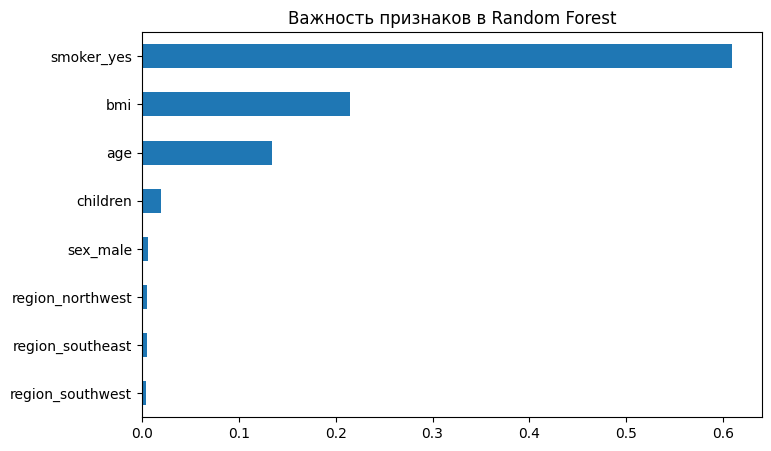

In [12]:
importances.sort_values().plot(kind='barh', figsize=(8,5))
plt.title("Важность признаков в Random Forest")
plt.show()

In [13]:
gb = GradientBoostingRegressor(
    n_estimators=300,   # количество деревьев
    learning_rate=0.05, # скорость обучения
    max_depth=3,        # глубина базовых деревьев
    random_state=42
)
gb.fit(X_train, y_train)

# Оценка качества
print("R^2 на тесте:", gb.score(X_test, y_test))

# Важность признаков
importances = pd.Series(gb.feature_importances_, index=X.columns)
print("Важность признаков:")
print(importances.sort_values(ascending=False))

R^2 на тесте: 0.877884236891984
Важность признаков:
smoker_yes          0.667912
bmi                 0.195324
age                 0.119687
children            0.011472
region_northwest    0.002573
region_southwest    0.001414
region_southeast    0.000937
sex_male            0.000681
dtype: float64


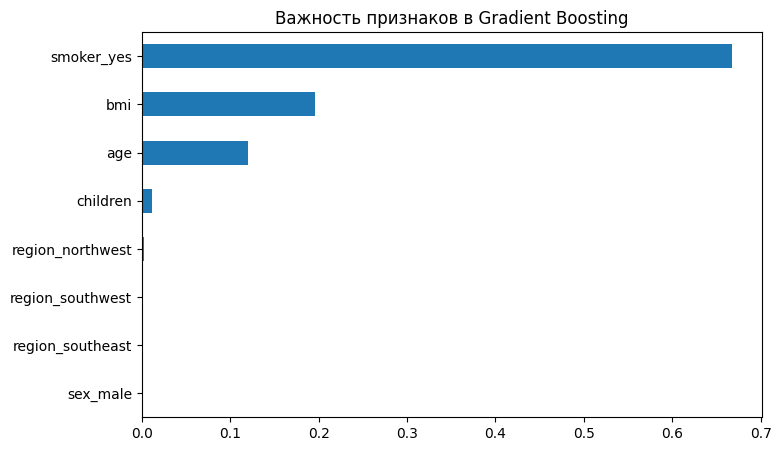

In [14]:
importances.sort_values().plot(kind='barh', figsize=(8,5))
plt.title("Важность признаков в Gradient Boosting")
plt.show()

In [15]:
xgb = XGBRegressor(
    n_estimators=500,     # количество деревьев
    learning_rate=0.05,   # скорость обучения
    max_depth=4,          # глубина деревьев
    subsample=0.8,        # доля выборки для каждого дерева
    colsample_bytree=0.8, # доля признаков для каждого дерева
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, y_train)

# Оценка качества
print("R^2 на тесте:", xgb.score(X_test, y_test))

# Важность признаков
importances = pd.Series(xgb.feature_importances_, index=X.columns)
print("Важность признаков:")
print(importances.sort_values(ascending=False))

R^2 на тесте: 0.8697441955442159
Важность признаков:
smoker_yes          0.874606
bmi                 0.037989
age                 0.033645
region_southwest    0.012455
children            0.011595
sex_male            0.011148
region_northwest    0.009330
region_southeast    0.009232
dtype: float32


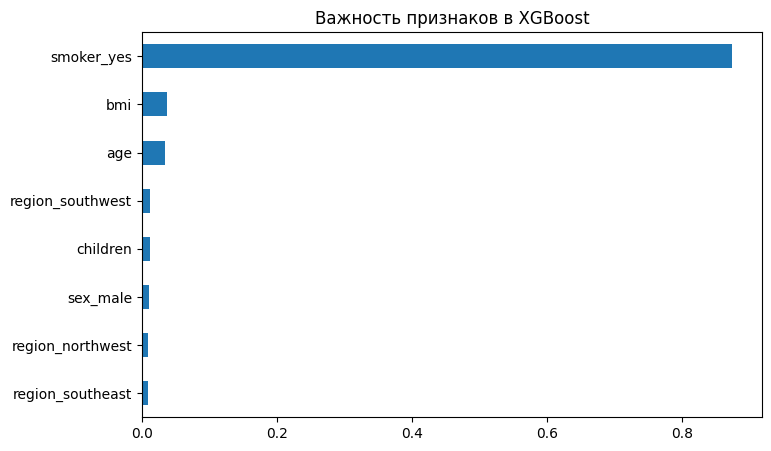

In [16]:
importances.sort_values().plot(kind='barh', figsize=(8,5))
plt.title("Важность признаков в XGBoost")
plt.show()

In [18]:
df = pd.read_csv("insurance.csv")

# Признаки и цель
X = df[['age','sex','bmi','children','smoker','region']]
y = df['charges']

# Указываем категориальные признаки (их индексы или названия)
categorical_features = ['sex', 'smoker', 'region']

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# CatBoost Regressor
cat = CatBoostRegressor(
    iterations=500,        # количество деревьев
    learning_rate=0.05,    # скорость обучения
    depth=16,               # глубина деревьев
    cat_features=categorical_features,
    verbose=100,           # вывод прогресса каждые 100 итераций
    random_state=42
)

cat.fit(X_train, y_train, cat_features=categorical_features)

# Оценка качества
print("R^2 на тесте:", cat.score(X_test, y_test))

# Важность признаков
importances = cat.get_feature_importance(prettified=True)
print(importances)

0:	learn: 11577.3676521	total: 156ms	remaining: 1m 17s
100:	learn: 3808.6347430	total: 35s	remaining: 2m 18s
200:	learn: 2504.2054655	total: 3m 54s	remaining: 5m 49s
300:	learn: 1884.8024573	total: 8m 21s	remaining: 5m 31s


KeyboardInterrupt: 

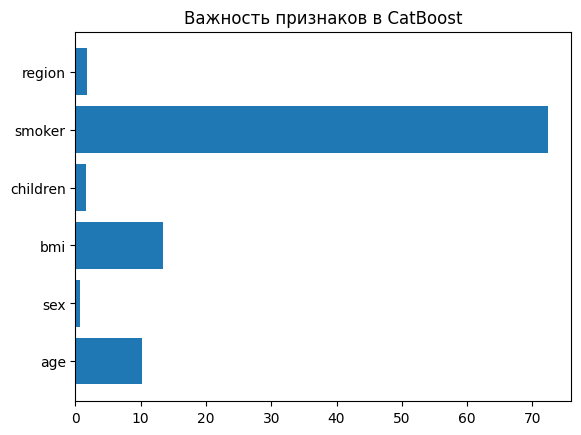

In [ ]:
feat_importances = cat.get_feature_importance()
plt.barh(X.columns, feat_importances)
plt.title("Важность признаков в CatBoost")
plt.show()

In [ ]:
df = pd.read_csv("insurance.csv")

# Признаки и цель
X = df[['age','sex','bmi','children','smoker','region']]
y = df['charges']

# One-hot encoding для категориальных колонок
X = pd.get_dummies(X, drop_first=True)

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# LightGBM Regressor
lgbm = lgb.LGBMRegressor(
    n_estimators=1000,     # количество деревьев
    learning_rate=0.05,   # скорость обучения
    max_depth=-1,         # глубина (-1 = без ограничения)
    num_leaves=31,        # число листьев (важный параметр)
    subsample=0.8,        # доля выборки для каждого дерева
    colsample_bytree=0.8, # доля признаков для каждого дерева
    random_state=42
)

lgbm.fit(X_train, y_train)

# Оценка качества
print("R^2 на тесте:", lgbm.score(X_test, y_test))

# Важность признаков
importances = pd.Series(lgbm.feature_importances_, index=X.columns)
print("Важность признаков:")
print(importances.sort_values(ascending=False))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 8
[LightGBM] [Info] Start training from score 13346.089733
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

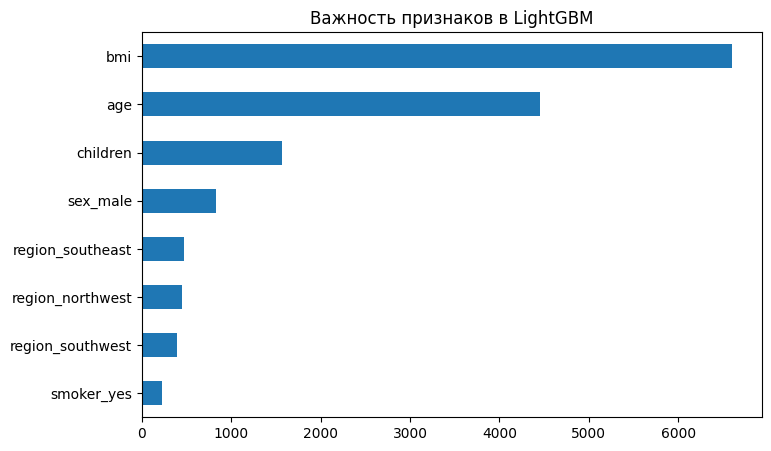

In [ ]:
importances.sort_values().plot(kind='barh', figsize=(8,5))
plt.title("Важность признаков в LightGBM")
plt.show()